<a href="https://colab.research.google.com/github/ChinmoyKumerRoy/ChinmoyKumerRoy/blob/main/NamtaDB_all_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2

In [ ]:
x = np.load('/content/drive/My Drive/Colab Notebooks/LICT/NamtaDB_x.npy')/255
y = np.load('/content/drive/My Drive/Colab Notebooks/LICT/NamtaDB_y.npy')

In [ ]:
x = x.reshape(-1,28,28,1)
from keras.utils import to_categorical
y = to_categorical(y)

In [ ]:
y.shape

(72045, 10)

In [ ]:
x.shape

(72045, 28, 28, 1)

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

In [ ]:
model = Sequential()



model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2, 2)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2, 2)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
dropout_5 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
dense_5 (Dense)              (None, 12, 12, 32)        544       
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dense_6 (Dense)              (None, 6, 6, 64)         

In [ ]:
history = model.fit(x,y, validation_split=0.2, epochs=50, batch_size=150)

Train on 57636 samples, validate on 14409 samples
Epoch 1/50
57636/57636 [==============================] - 12s 204us/step - loss: 1.2430 - accuracy: 0.5697 - val_loss: 0.9036 - val_accuracy: 0.7736
Epoch 2/50
57636/57636 [==============================] - 6s 99us/step - loss: 0.6876 - accuracy: 0.7594 - val_loss: 0.6571 - val_accuracy: 0.8324
Epoch 3/50
57636/57636 [==============================] - 6s 98us/step - loss: 0.5534 - accuracy: 0.8064 - val_loss: 0.5505 - val_accuracy: 0.8529
Epoch 4/50
57636/57636 [==============================] - 6s 99us/step - loss: 0.4956 - accuracy: 0.8270 - val_loss: 0.4688 - val_accuracy: 0.8858
Epoch 5/50
57636/57636 [==============================] - 6s 98us/step - loss: 0.4561 - accuracy: 0.8404 - val_loss: 0.4083 - val_accuracy: 0.9051
Epoch 6/50
57636/57636 [==============================] - 6s 98us/step - loss: 0.4251 - accuracy: 0.8521 - val_loss: 0.3631 - val_accuracy: 0.9048
Epoch 7/50
57636/57636 [==============================] - 6s 97us/

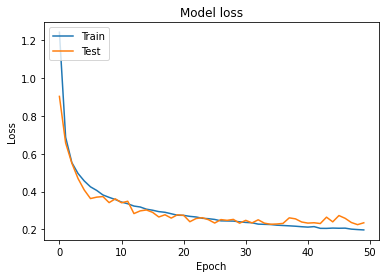

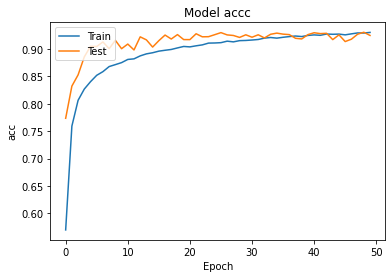

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save_weights('NamtaDB_model.h5')

In [ ]:
import cv2

all_img = []
for i in range(0,10):
  img1 = cv2.imread(str(i)+'.png',0)
  (thresh, im_bw) = cv2.threshold(img1, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
  inv = cv2.bitwise_not(im_bw)
  all_img.append(cv2.resize(inv, (28,28)))

In [ ]:
all_img = np.array(all_img)

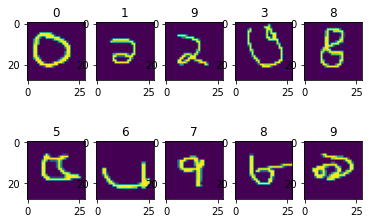

In [ ]:
for i in range(1,11):
  plt.subplot(2,5,i)
  plt.imshow(all_img[i-1])
  plt.title(np.argmax(model.predict(np.reshape(all_img[i-1],(-1,28,28,1)))))
